In [123]:
# Here is the part where we can load the specific .csv file for the location desired location into the dataframe
# To make easier, extract the precipitation column 
# Replace 'precipitation' with the actual column name if different.
# Create a new data frame with only precipitation
data <- read.csv("ClimateEngine_Sakonnet.csv")   
precipitation <- data$precipitation 
precipitation_df <- data.frame(precipitation)


In [124]:
# Change column names to "Date" and "Precipitation"

In [125]:
colnames(data) <- c("Date", "Precipitation")

In [126]:
install.packages("lubridate")
library(lubridate)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [127]:
# # Convert Date column from character to Date class

In [128]:
data$Date <- as.Date(data$Date, format="%Y-%m-%d")
class(data$Date)


[1] "Date"

In [ ]:
# Load necessary libraries
# Ensure 'Date' is in Date format
# Aggregate daily precipitation to weekly total (sum of precipitation within each week)
# Aggregate weekly precipitation
# Get the current year
# Filter for the last 10 years
# For each year, find the week with the most precipitation (last 10 years)
# For each year, find the week with the most precipitation (last 10 years)
# Maximum Precipitation Week (Last 10 Years)
# **New**: Print all days with precipitation greater than or equal to 76 mm
#Closure Days

In [136]:
library(dplyr)
library(lubridate)

data$Date <- as.Date(data$Date)  
data$Week <- as.Date(cut(data$Date, breaks = "week", start.on.monday = TRUE)) 

weekly_precip_all_years <- data %>%
  group_by(Year = year(Week), Week) %>%
  summarise(total_precipitation = sum(Precipitation, na.rm = TRUE))

current_year <- year(Sys.Date())

last_10_years <- current_year - 10

max_precip_weeks_all_years <- weekly_precip_all_years %>%
  filter(Year > last_10_years) %>%
  group_by(Year) %>%
  filter(total_precipitation == max(total_precipitation)) %>%
  ungroup()

cat("Maximum Precipitation Week (Last 10 Years)\n\n")
print(max_precip_weeks_all_years)

heavy_precip_weeks_all_years <- weekly_precip_all_years %>%
  filter(Year > last_10_years) %>%
  filter(total_precipitation >= 76)

cat("\nHeavy Precipitation Weeks (Last 10 Years)\n\n")
print(heavy_precip_weeks_all_years)

heavy_precip_days_all_years <- data %>%
  filter(Precipitation >= 76)

cat("\nClosure Days\n\n")
print(heavy_precip_days_all_years)


`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


Maximum Precipitation Week (Last 10 Years)

# A tibble: 10 × 3
    Year Week       total_precipitation
   <dbl> <date>                   <dbl>
 1  2015 2015-09-28                84.4
 2  2016 2016-02-01                79.4
 3  2017 2017-10-23               131. 
 4  2018 2018-02-26                86.6
 5  2019 2019-12-09               112. 
 6  2020 2020-11-30                98.7
 7  2021 2021-08-30               152. 
 8  2022 2022-09-05                60.8
 9  2023 2023-07-10               113  
10  2024 2024-03-04                89.4

Heavy Precipitation Weeks (Last 10 Years)

# A tibble: 20 × 3
# Groups:   Year [9]
    Year Week       total_precipitation
   <dbl> <date>                   <dbl>
 1  2015 2015-09-28                84.4
 2  2016 2016-02-01                79.4
 3  2017 2017-10-23               131. 
 4  2018 2018-01-08                85.7
 5  2018 2018-02-26                86.6
 6  2018 2018-11-12                82.8
 7  2019 2019-01-14                77.2
 8  2019 2019

In [ ]:
#Summarize the total precipitation for each month and year
# Identify the month with the highest total precipitation for each year
# Filter data to only include the last 5 years
# Print the tibble with the last 5 years of maximum precipitation data
# Set global option to show all rows for tibbles (optional)
# Filter data to only include the last 5 years for the monthly precipitation plot
# Create a plot using ggplot
 # Save the plot to a smaller file with improved spacing
# Print the plot in the RStudio viewer



`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


Maximum Precipitation Month (Last 5 Years)

# A tibble: 6 × 4
# Groups:   year [6]
   year month date       total_precipitation
  <dbl> <dbl> <date>                   <dbl>
1  2019    12 2019-12-01                222.
2  2020    12 2020-12-01                165.
3  2021     9 2021-09-01                239.
4  2022     2 2022-02-01                153.
5  2023     7 2023-07-01                169.
6  2024     3 2024-03-01                247.


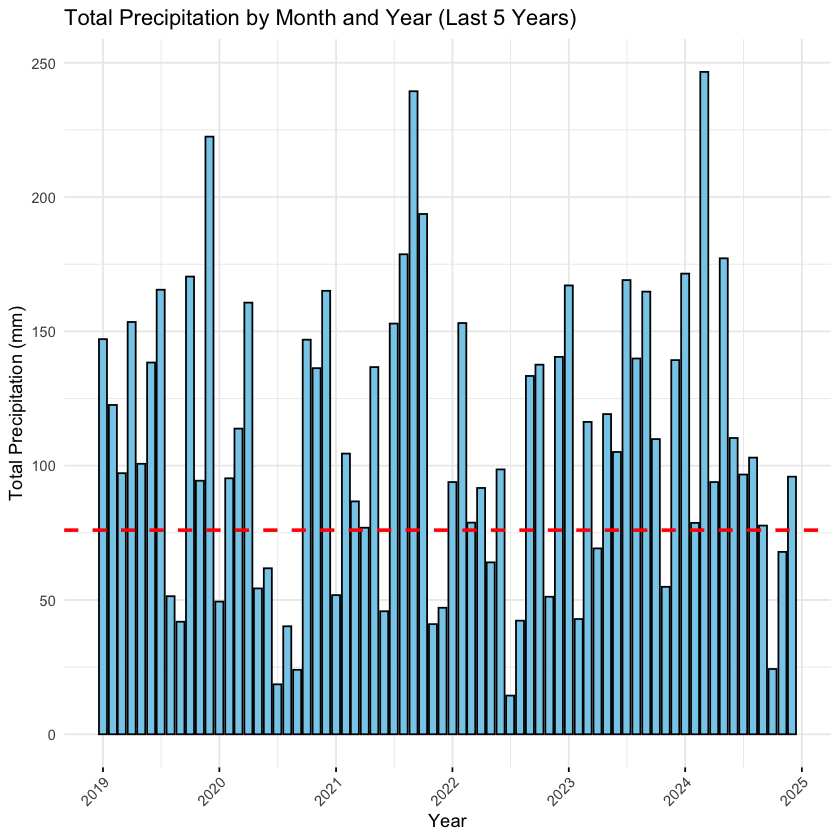

In [130]:
library(dplyr)
library(lubridate)
library(ggplot2)

monthly_precipitation <- data %>%
  mutate(year = year(Date), 
         month = month(Date),
         date = make_date(year, month, 1)) %>%  # Create a Date object for the first of each month
  group_by(year, month, date) %>%
  summarise(total_precipitation = sum(Precipitation, na.rm = TRUE)) %>%
  arrange(date)

max_precipitation_per_year <- monthly_precipitation %>%
  group_by(year) %>%
  slice_max(order_by = total_precipitation, n = 1)

last_5_years <- max(monthly_precipitation$year)  # Get the most recent year
max_precipitation_per_year_last_5 <- max_precipitation_per_year %>%
  filter(year >= last_5_years - 5)  # Only include the last 5 years

cat("Maximum Precipitation Month (Last 5 Years)\n\n")
print(max_precipitation_per_year_last_5)

options(tibble.print_max = Inf)

filtered_data <- monthly_precipitation %>%
  filter(year >= last_5_years - 5)  # Only include the last 5 years

plot <- ggplot(filtered_data, aes(x = date, y = total_precipitation)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  theme_minimal() +
  labs(
    title = "Total Precipitation by Month and Year (Last 5 Years)",
    x = "Year",
    y = "Total Precipitation (mm)"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels for readability
  scale_x_date(
    breaks = "1 year",  # Breaks every year
    labels = scales::date_format("%Y"),  # set years as labels
    expand = c(0.05, 0.05)  # Oadds space around x-axis
  ) +
  theme(axis.ticks.x = element_line(color = "black")) +  # Add tick marks on the x-axis
  geom_hline(yintercept = 76, linetype = "dashed", color = "red", size = 1)  # Add dashed line at 76 mm

ggsave("precipitation_plot_last_5_years_with_threshold.png", plot = plot, width = 8, height = 5, dpi = 300)

print(plot)


In [ ]:
# Load necessary libraries
# Define the years for which you want to plot (last 5 years)
# Loop through each year and create the plot
 # Filter the data for the current year
# Summarize daily precipitation for the current year
# Create and print the plot for the current year


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


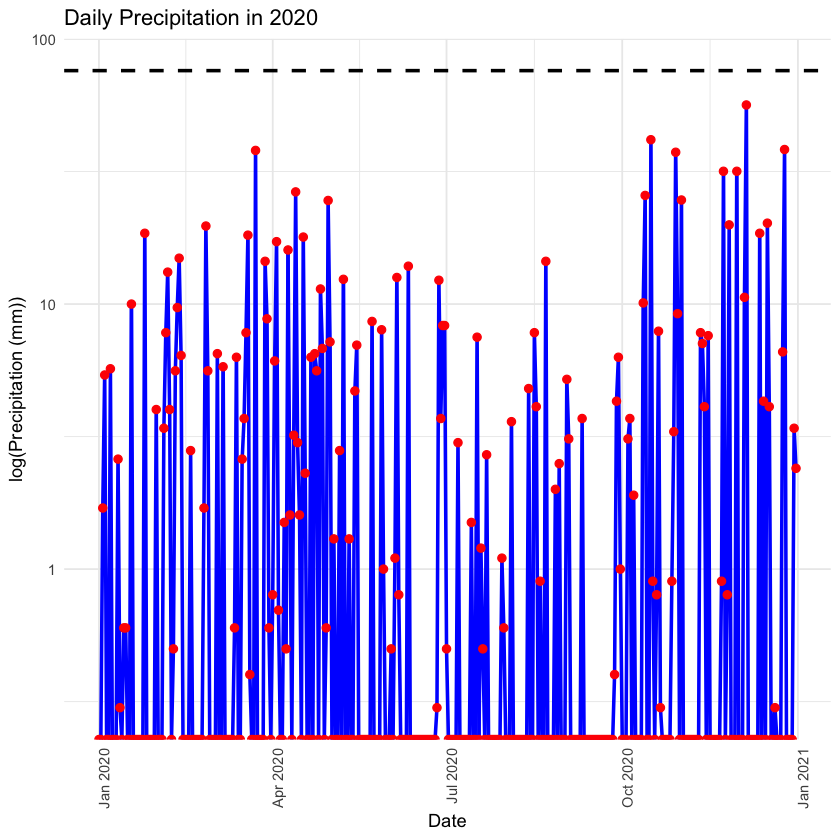

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


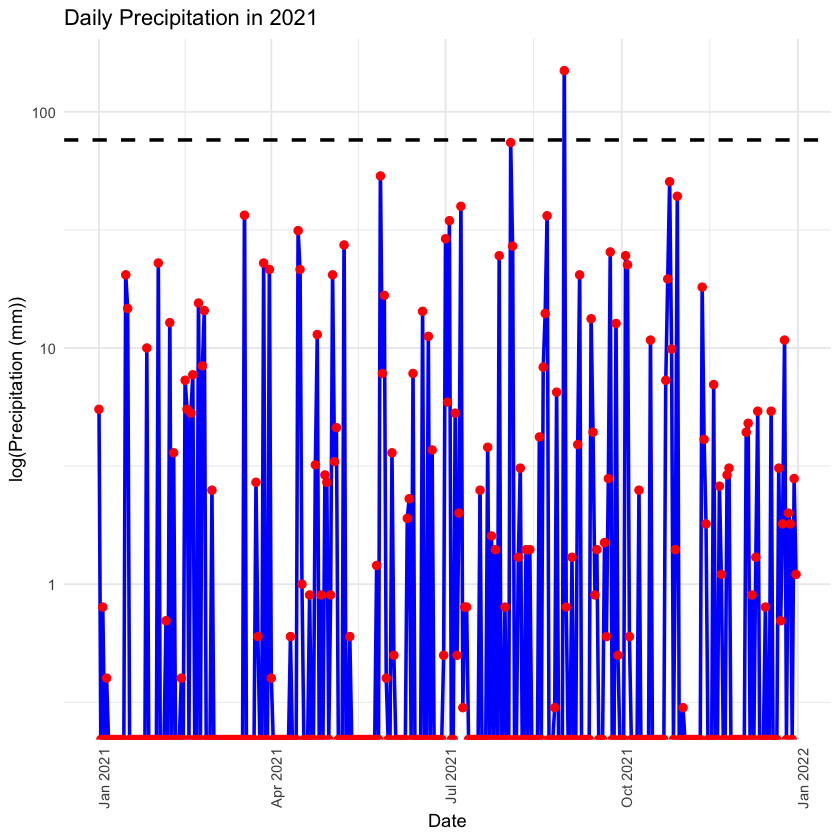

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


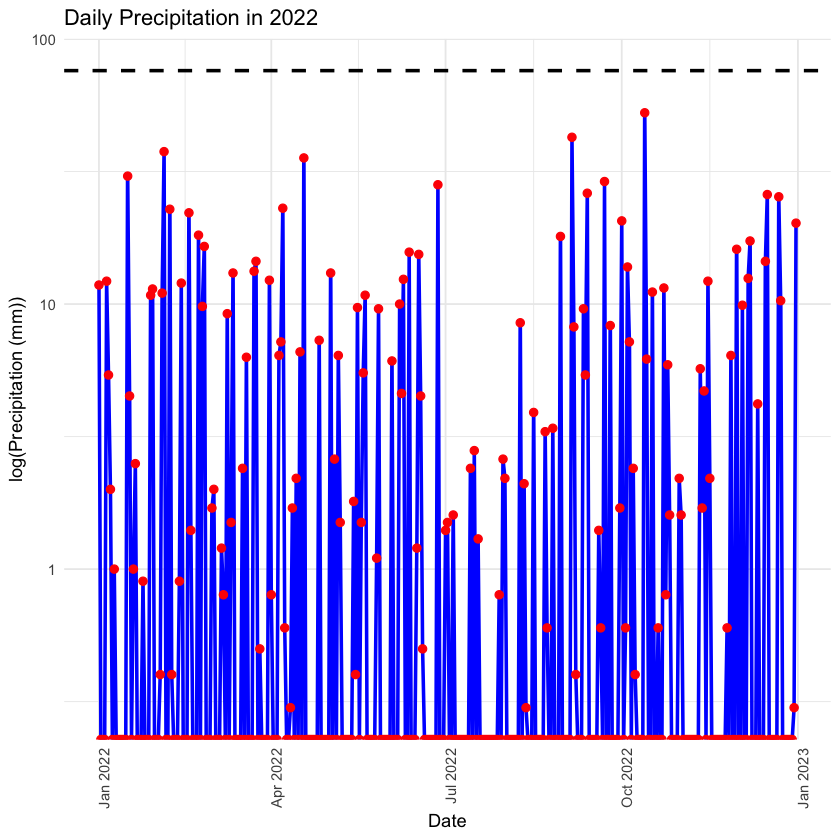

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


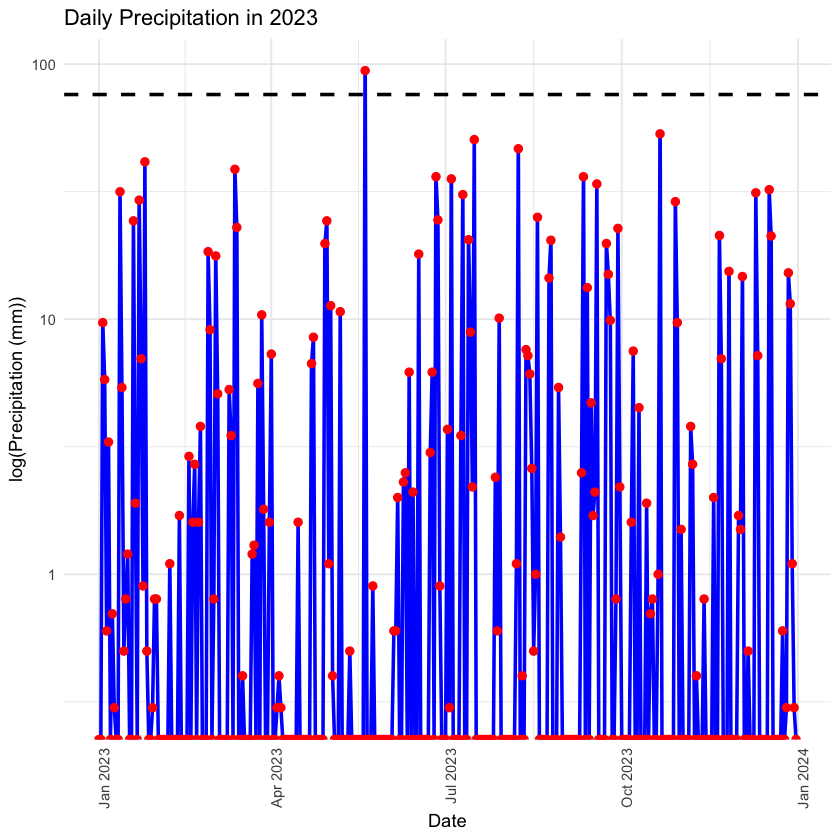

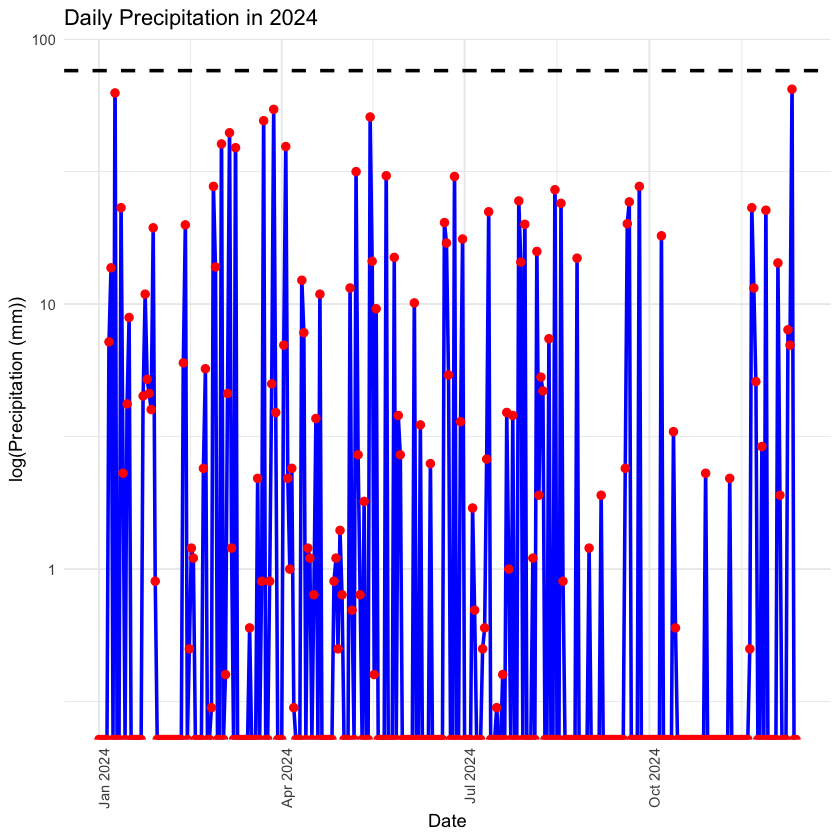

In [131]:
library(dplyr)
library(lubridate)
library(ggplot2)

years_to_plot <- 2020:2024

for (year in years_to_plot) {
  
  data_year <- data %>%
    filter(year(Date) == year)
  
  daily_precipitation_year <- data_year %>%
    group_by(Date) %>%
    summarise(total_precipitation = sum(Precipitation, na.rm = TRUE))
  
  p <- ggplot(daily_precipitation_year, aes(x = Date, y = total_precipitation)) +
    geom_line(color = "blue", size = 1) +  # Line plot for daily precipitation
    geom_point(color = "red", size = 2) +  # Red Points
    geom_hline(yintercept = 76, linetype = "dashed", color = "black", size = 1) +  # Add a dashed line at 76 mm
    scale_y_log10() +  # Set Y-axis to log scale
    theme_minimal() +
    labs(
      title = paste("Daily Precipitation in", year),
      x = "Date",
      y = "log(Precipitation (mm))"  # Y-axis label
    ) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))  # Rotate x-axis labels for readability
  
  print(p)
}


In [132]:
# Summarize the total precipitation for each month and year
# Get the last 5 years
# Loop through each year and create a separate plot
  # Filter data for the current year
  # Create a plot for the current year
 # Save each plot to a separate file
  # Print the plot in the RStudio viewer


`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


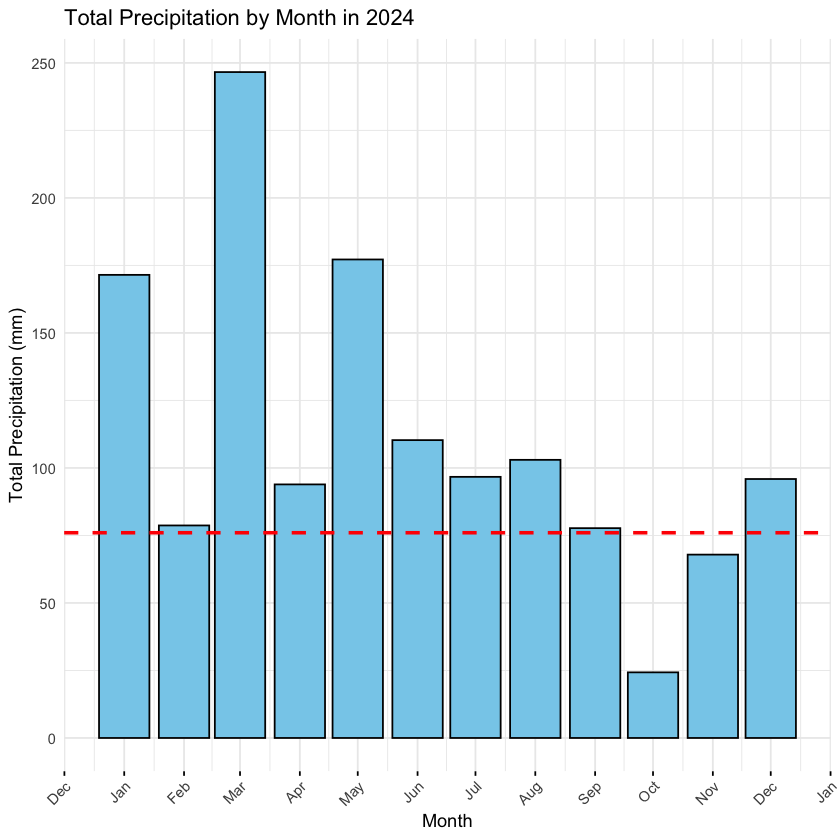

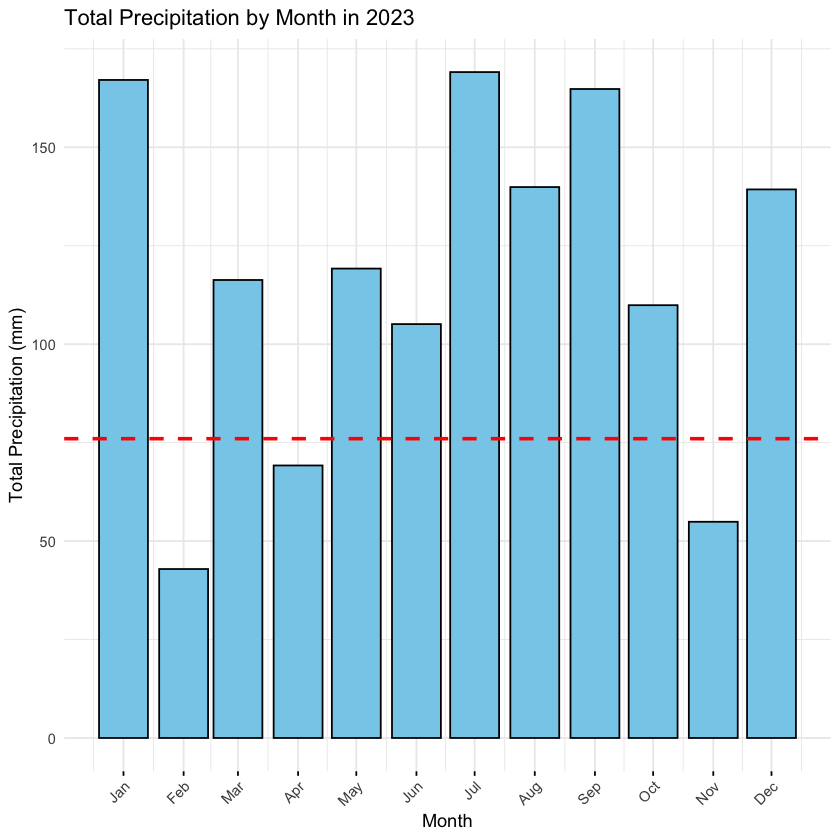

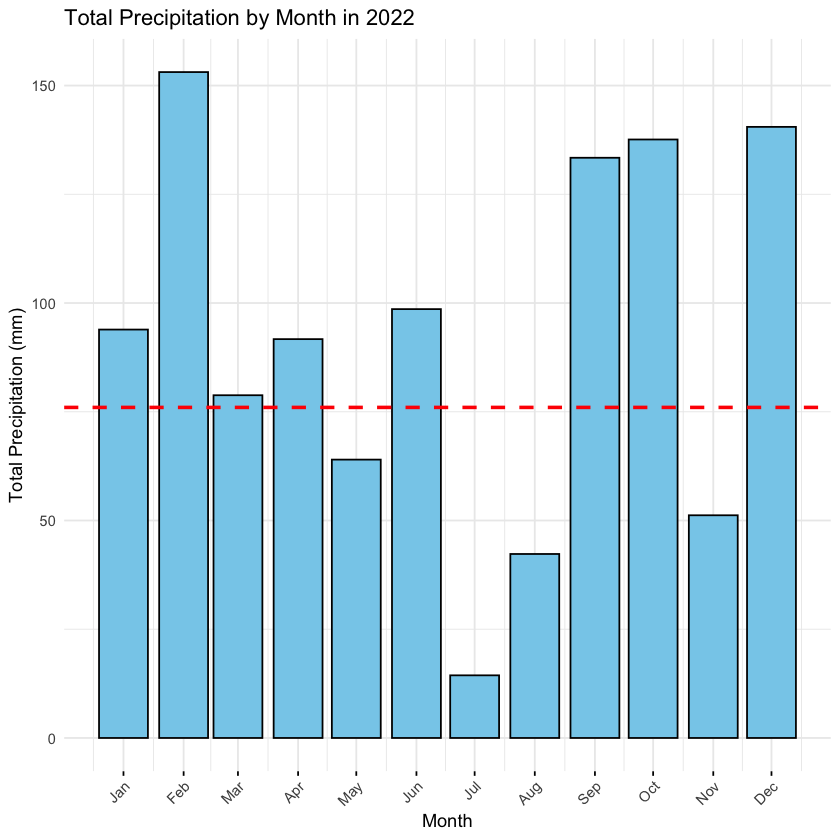

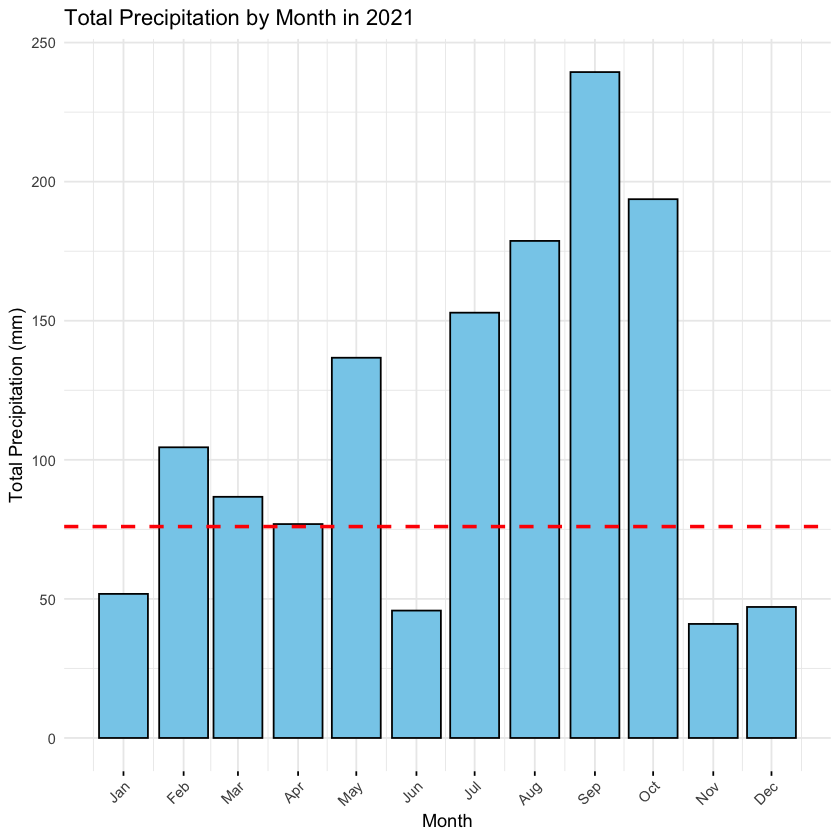

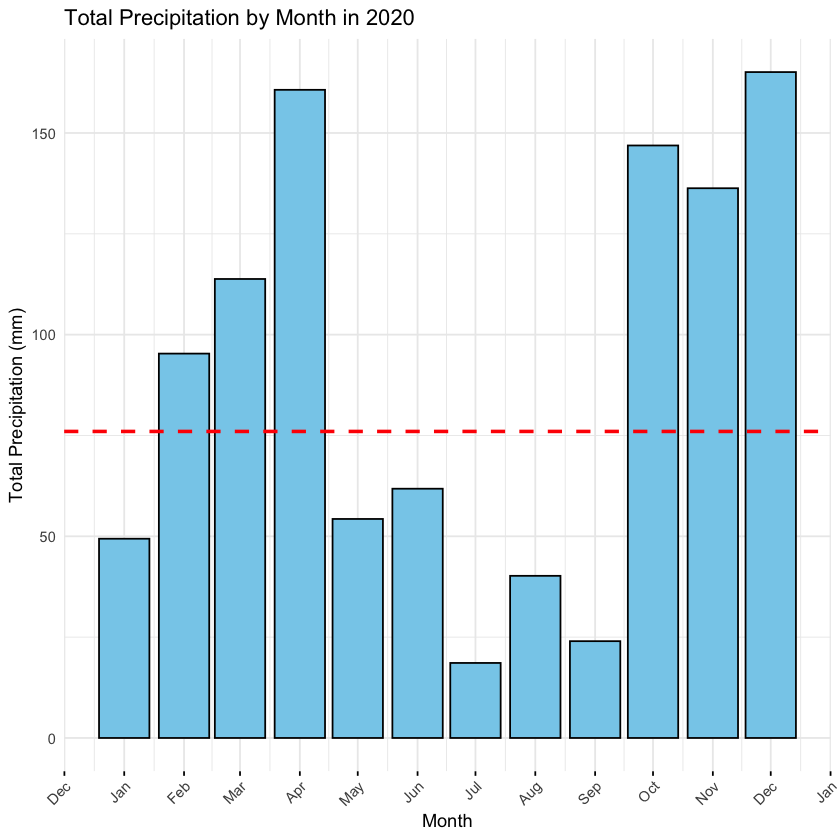

In [133]:
library(dplyr)
library(lubridate)
library(ggplot2)

monthly_precipitation <- data %>%
  mutate(year = year(Date), 
         month = month(Date),
         date = make_date(year, month, 1)) %>%  # Create a Date object for the first of each month
  group_by(year, month, date) %>%
  summarise(total_precipitation = sum(Precipitation, na.rm = TRUE)) %>%
  arrange(date)

last_5_years <- max(monthly_precipitation$year)  # Get the most recent year
years_to_plot <- last_5_years:(last_5_years - 4)  # Generate the years for the last 5 years

for (yr in years_to_plot) {
  
  filtered_data <- monthly_precipitation %>%
    filter(year == yr)
  
  plot <- ggplot(filtered_data, aes(x = date, y = total_precipitation)) +
    geom_bar(stat = "identity", fill = "skyblue", color = "black") +
    theme_minimal() +
    labs(
      title = paste("Total Precipitation by Month in", yr),
      x = "Month",
      y = "Total Precipitation (mm)"
    ) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels for readability
    scale_x_date(
      breaks = "1 month",  # Breaks every month
      labels = scales::date_format("%b"),  # Format labels as month names
      expand = c(0.05, 0.05)  # Optional: Adds space around the x-axis labels
    ) +
    theme(axis.ticks.x = element_line(color = "black")) +  # Add tick marks on the x-axis
    geom_hline(yintercept = 76, linetype = "dashed", color = "red", size = 1)  # Dashed line at 76 mm
  
  ggsave(paste0("precipitation_plot_", yr, ".png"), plot = plot, width = 8, height = 5, dpi = 300)
  
  print(plot)
}


In [134]:
# Install and load the forecast package if necessary
# Load necessary libraries
# Make sure the 'Date' column is in Date format
# Aggregate daily precipitation to monthly total (or average)
# Convert the aggregated data to a time series object
# Fit an ARIMA model to the time series data
# Forecast for the next 12 months (next year)
# Plot the full forecast
# Print the forecasted values
# Extract forecast for 2025 (next year)
# Plot forecast only for 2025


         Point Forecast    Lo 80    Hi 80       Lo 95    Hi 95
Jan 2025       98.23412 29.24917 167.2191  -7.2692617 203.7375
Feb 2025      107.85147 38.72400 176.9789   2.1301249 213.5728
Mar 2025       92.29455 23.16649 161.4226 -13.4276955 198.0168
Apr 2025      106.34790 37.21984 175.4760   0.6256503 212.0701
May 2025       98.49917 29.37110 167.6272  -7.2230828 204.2214
Jun 2025      104.58786 35.45980 173.7159  -1.1343907 210.3101
Jul 2025      105.34654 36.21847 174.4746  -0.3757122 211.0688
Aug 2025      104.99467 35.86661 174.1227  -0.7275803 210.7169
Sep 2025      106.99239 37.86433 176.1205   1.2701437 212.7146
Oct 2025      112.21724 43.08918 181.3453   6.4949904 217.9395
Nov 2025      108.82416 39.69610 177.9522   3.1019119 214.5464
Dec 2025      105.57271 36.44464 174.7008  -0.1495435 211.2950


Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


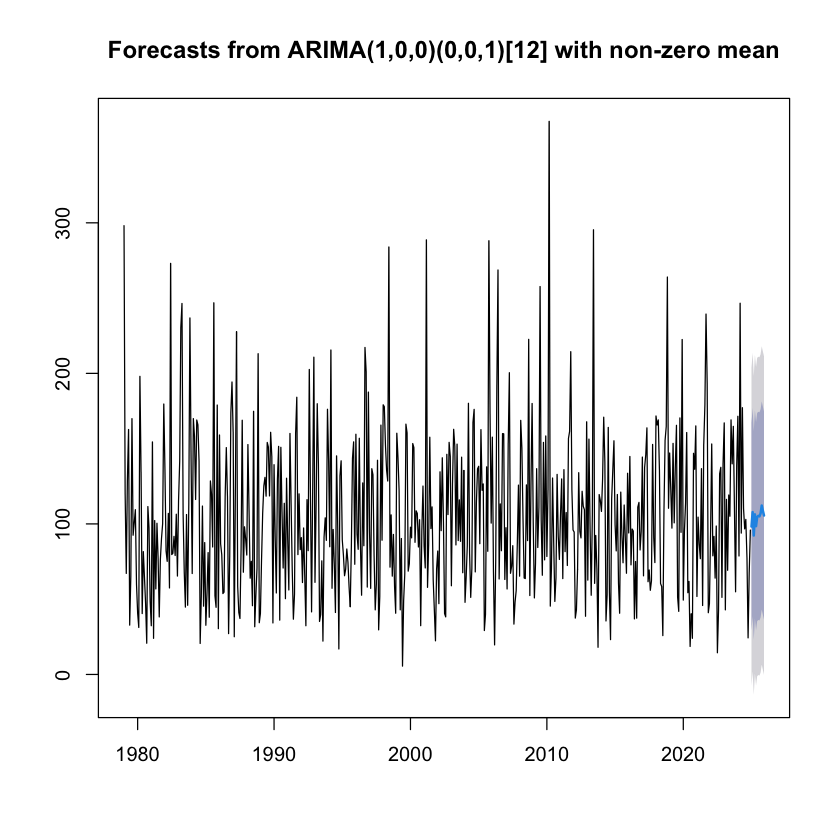

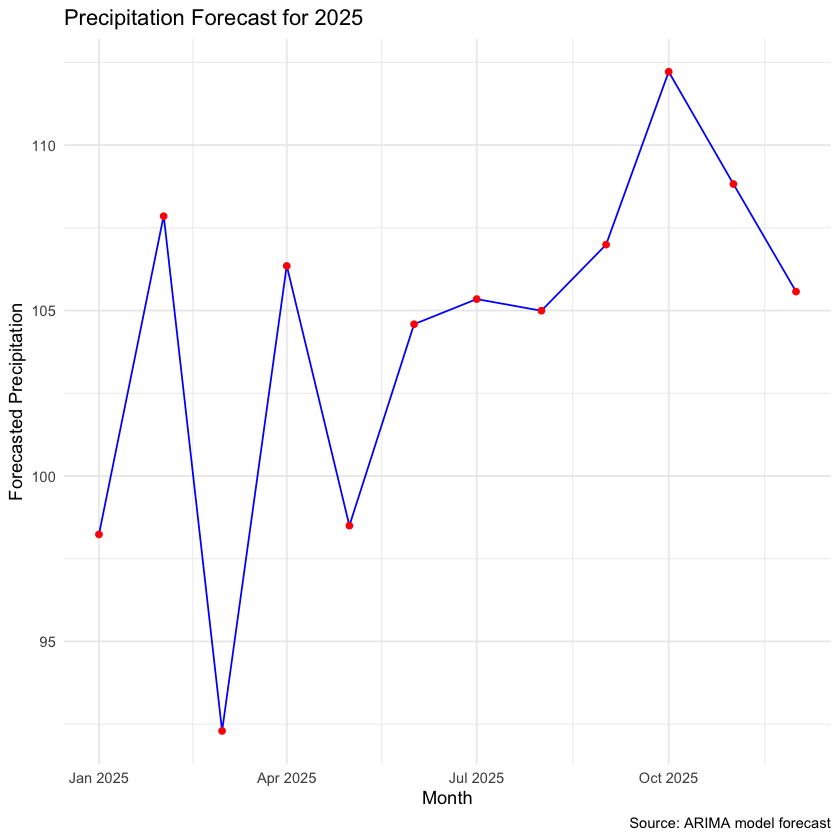

In [135]:

if (!require(forecast)) {
  install.packages("forecast")
  library(forecast)
}

library(tidyverse)
data$Date <- as.Date(data$Date)
monthly_precipitation <- data %>%
  mutate(month = as.Date(cut(Date, "month"))) %>%
  group_by(month) %>%
  summarise(total_precipitation = sum(Precipitation, na.rm = TRUE))

ts_precip <- ts(monthly_precipitation$total_precipitation, frequency = 12, start = c(1979, 1))

arima_model <- auto.arima(ts_precip)

forecast_result <- forecast(arima_model, h = 12)
plot(forecast_result)
print(forecast_result)

forecast_2025 <- data.frame(
  Month = seq(as.Date("2025-01-01"), by = "month", length.out = 12),
  Forecast = forecast_result$mean
)

ggplot(forecast_2025, aes(x = Month, y = Forecast)) +
  geom_line(color = "blue") +
  geom_point(color = "red") +
  labs(title = "Precipitation Forecast for 2025",
       x = "Month",
       y = "Forecasted Precipitation",
       caption = "Source: ARIMA model forecast") +
  theme_minimal()
